## Importing Libraries

In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#### Dataset Link: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset

## Data Preprocessing

### Training Image Preprocessing

In [5]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'C:/Users/ASUS/OneDrive/Desktop/Plant Dieseas Prediction/Plant_Disease_Dataset/train',
    labels="inferred",
    label_mode="categorical",
    image_size=(128, 128),
    batch_size=32,
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 70295 files belonging to 38 classes.


### Validation Image Preprocessing

In [6]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'C:/Users/ASUS/OneDrive/Desktop/Plant Dieseas Prediction/Plant_Disease_Dataset/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [7]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [8]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[255.   255.   255.  ]
   [255.   255.   255.  ]
   [255.   255.   255.  ]
   ...
   [255.   255.   255.  ]
   [255.   255.   255.  ]
   [255.   255.   255.  ]]

  [[255.   255.   255.  ]
   [255.   255.   255.  ]
   [255.   255.   255.  ]
   ...
   [255.   255.   255.  ]
   [255.   255.   255.  ]
   [255.   255.   255.  ]]

  [[255.   255.   255.  ]
   [255.   255.   255.  ]
   [255.   255.   255.  ]
   ...
   [255.   255.   255.  ]
   [255.   255.   255.  ]
   [255.   255.   255.  ]]

  ...

  [[255.   255.   255.  ]
   [255.   255.   255.  ]
   [255.   255.   255.  ]
   ...
   [255.   255.   255.  ]
   [255.   255.   255.  ]
   [255.   255.   255.  ]]

  [[255.   255.   255.  ]
   [255.   255.   255.  ]
   [255.   255.   255.  ]
   ...
   [255.   255.   255.  ]
   [255.   255.   255.  ]
   [255.   255.   255.  ]]

  [[255.   255.   255.  ]
   [255.   255.   255.  ]
   [255.   255.   255.  ]
   ...
   [255.   255.   255.  ]
   [255.   255.   255.  ]
   [255.   255.   25

### To avoid Overshooting
1. Choose small learning rate default 0.001 we are taking 0.0001
2. There may be chance of Underfitting, so increase number of neuron
3. Add more Convolution layer to extract more feature from images there may be possibilty that model unable to capture relevant feature or model is confusing due to lack of feature so feed with more feature

## Building Model

In [9]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [10]:
model = Sequential()

In [11]:
## Building Convolution Layer

In [12]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

C:\Users\ASUS\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [14]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [15]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [16]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [17]:
model.add(Dropout(0.25)) # To avoid Overfitting

In [18]:
model.add(Flatten())

In [19]:
model.add(Dense(units=1500,activation='relu'))

In [20]:
model.add(Dropout(0.4))

In [21]:
#Output Layer
model.add(Dense(units=38,activation='softmax'))

### Compiling Model

In [22]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),  # Remove 'legacy'
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │          57,038 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

### Model Training

In [24]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2218s 1s/step - accuracy: 0.3949 - loss: 2.1679 - val_accuracy: 0.8301 - val_loss: 0.5366
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1874s 853ms/step - accuracy: 0.8389 - loss: 0.5155 - val_accuracy: 0.9031 - val_loss: 0.2996
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1849s 841ms/step - accuracy: 0.9040 - loss: 0.2977 - val_accuracy: 0.9072 - val_loss: 0.2874
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2447s 1s/step - accuracy: 0.9344 - loss: 0.1994 - val_accuracy: 0.9479 - val_loss: 0.1602
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2008s 914ms/step - accuracy: 0.9524 - loss: 0.1437 - val_accuracy: 0.9608 - val_loss: 0.1232
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1793s 816ms/step - accuracy: 0.9619 - loss: 0.1143 - val_accuracy: 0.9297 - val_loss: 0.2187
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2226s 1s/step - accuracy: 0.9662 - loss: 0.1026 - val_accuracy: 0.9655 - val_loss: 0.1166
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2440s 1s/step - accura

## Model Evaluation

In [25]:
#Model Evaluation on Training set
train_loss,train_acc = model.evaluate(training_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 489s 223ms/step - accuracy: 0.9717 - loss: 0.0884


In [26]:
print(train_loss,train_acc)

0.08418048173189163 0.9730848670005798


In [27]:
#Model on Validation set
val_loss,val_acc = model.evaluate(validation_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 121s 220ms/step - accuracy: 0.9419 - loss: 0.1984


In [28]:
print(val_loss,val_acc)

0.20201997458934784 0.939847469329834


### Saving Model

In [29]:
model.save("trained_model.keras")

In [30]:
training_history.history

{'accuracy': [0.5995590090751648,
  0.8613272905349731,
  0.9137492179870605,
  0.9402375817298889,
  0.9559570550918579,
  0.9661568999290466,
  0.9707944989204407,
  0.9752044677734375,
  0.9792730808258057,
  0.9817910194396973],
 'loss': [1.3653321266174316,
  0.43867766857147217,
  0.2679550051689148,
  0.18265417218208313,
  0.13419967889785767,
  0.10214675217866898,
  0.08874887228012085,
  0.07401614636182785,
  0.06172916293144226,
  0.056400761008262634],
 'val_accuracy': [0.830127477645874,
  0.9031413793563843,
  0.907238781452179,
  0.9479285478591919,
  0.9607899188995361,
  0.9296607971191406,
  0.9654564261436462,
  0.9599931836128235,
  0.9354085922241211,
  0.939847469329834],
 'val_loss': [0.5366190671920776,
  0.29962775111198425,
  0.2873592972755432,
  0.16023743152618408,
  0.12318602204322815,
  0.21870927512645721,
  0.1165597140789032,
  0.12765558063983917,
  0.2234535962343216,
  0.20201998949050903]}

In [31]:
#Recording History in json
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)

In [32]:
training_history.history['val_accuracy']

[0.830127477645874,
 0.9031413793563843,
 0.907238781452179,
 0.9479285478591919,
 0.9607899188995361,
 0.9296607971191406,
 0.9654564261436462,
 0.9599931836128235,
 0.9354085922241211,
 0.939847469329834]

### Accuracy Visualization

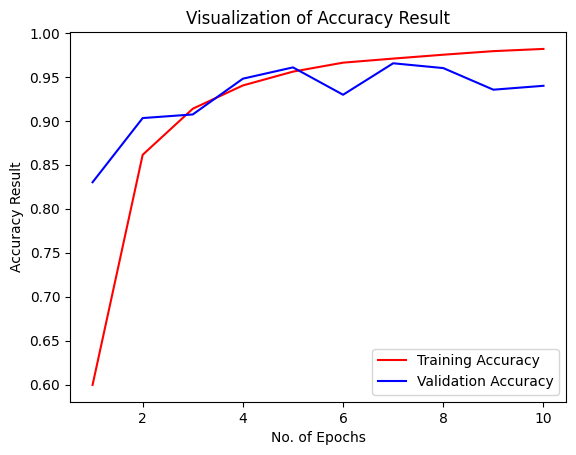

In [33]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

### Some other metrics for model evaluation

In [34]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [37]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'C:/Users/ASUS/OneDrive/Desktop/Plant Dieseas Prediction/Plant_Disease_Dataset/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [38]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

550/550 ━━━━━━━━━━━━━━━━━━━━ 180s 326ms/step


(array([[9.9955410e-01, 1.7995462e-05, 4.8343956e-08, ..., 8.3885031e-11,
         7.6095402e-10, 7.4350237e-10],
        [9.9952865e-01, 4.2714726e-04, 3.2989017e-06, ..., 4.6142080e-11,
         8.6974095e-10, 1.9970389e-07],
        [9.9986410e-01, 1.7730441e-06, 4.0272621e-08, ..., 8.5143524e-12,
         1.5405346e-09, 6.1620185e-08],
        ...,
        [1.6589568e-12, 5.4257158e-13, 3.3280485e-09, ..., 1.2230450e-11,
         4.2511212e-13, 1.0000000e+00],
        [5.8015665e-11, 2.8084847e-11, 2.6373700e-08, ..., 1.8189767e-09,
         6.8541416e-11, 9.9999678e-01],
        [2.0999788e-14, 3.4244320e-13, 2.7130249e-12, ..., 2.3247682e-12,
         4.6160580e-12, 9.9999464e-01]], dtype=float32),
 (17572, 38))

In [40]:
predicted_categories = tf.argmax(y_pred,axis=1)

In [41]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [42]:
true_categories = tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [43]:
Y_true = tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

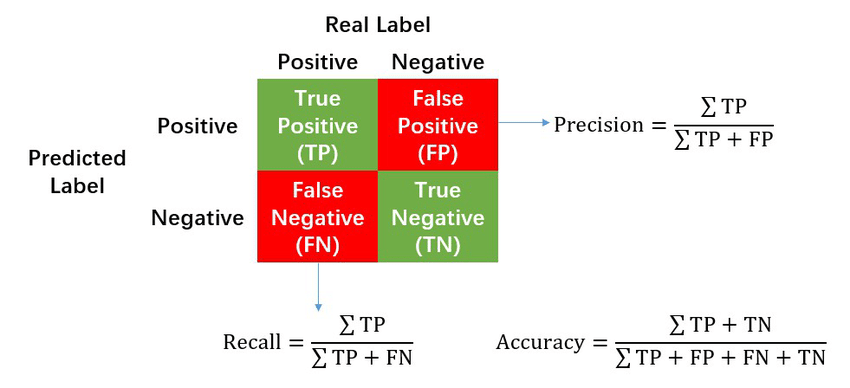

In [44]:
from sklearn.metrics import classification_report,confusion_matrix

In [45]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       1.00      0.80      0.89       504
                                 Apple___Black_rot       0.97      0.95      0.96       497
                          Apple___Cedar_apple_rust       0.96      0.98      0.97       440
                                   Apple___healthy       0.91      0.95      0.93       502
                               Blueberry___healthy       0.98      0.93      0.95       454
          Cherry_(including_sour)___Powdery_mildew       0.98      0.98      0.98       421
                 Cherry_(including_sour)___healthy       0.95      0.98      0.97       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.94      0.92      0.93       410
                       Corn_(maize)___Common_rust_       0.99      1.00      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.95      0.95      0.

In [46]:
cm = confusion_matrix(Y_true,predicted_categories)
cm

array([[402,  11,   0, ...,   0,   1,   0],
       [  0, 473,   0, ...,   0,   0,   0],
       [  0,   0, 432, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 488,   0,   0],
       [  0,   0,   0, ...,   0, 428,   0],
       [  0,   0,   1, ...,   0,   0, 475]])

### Confusion Matrix Visualization

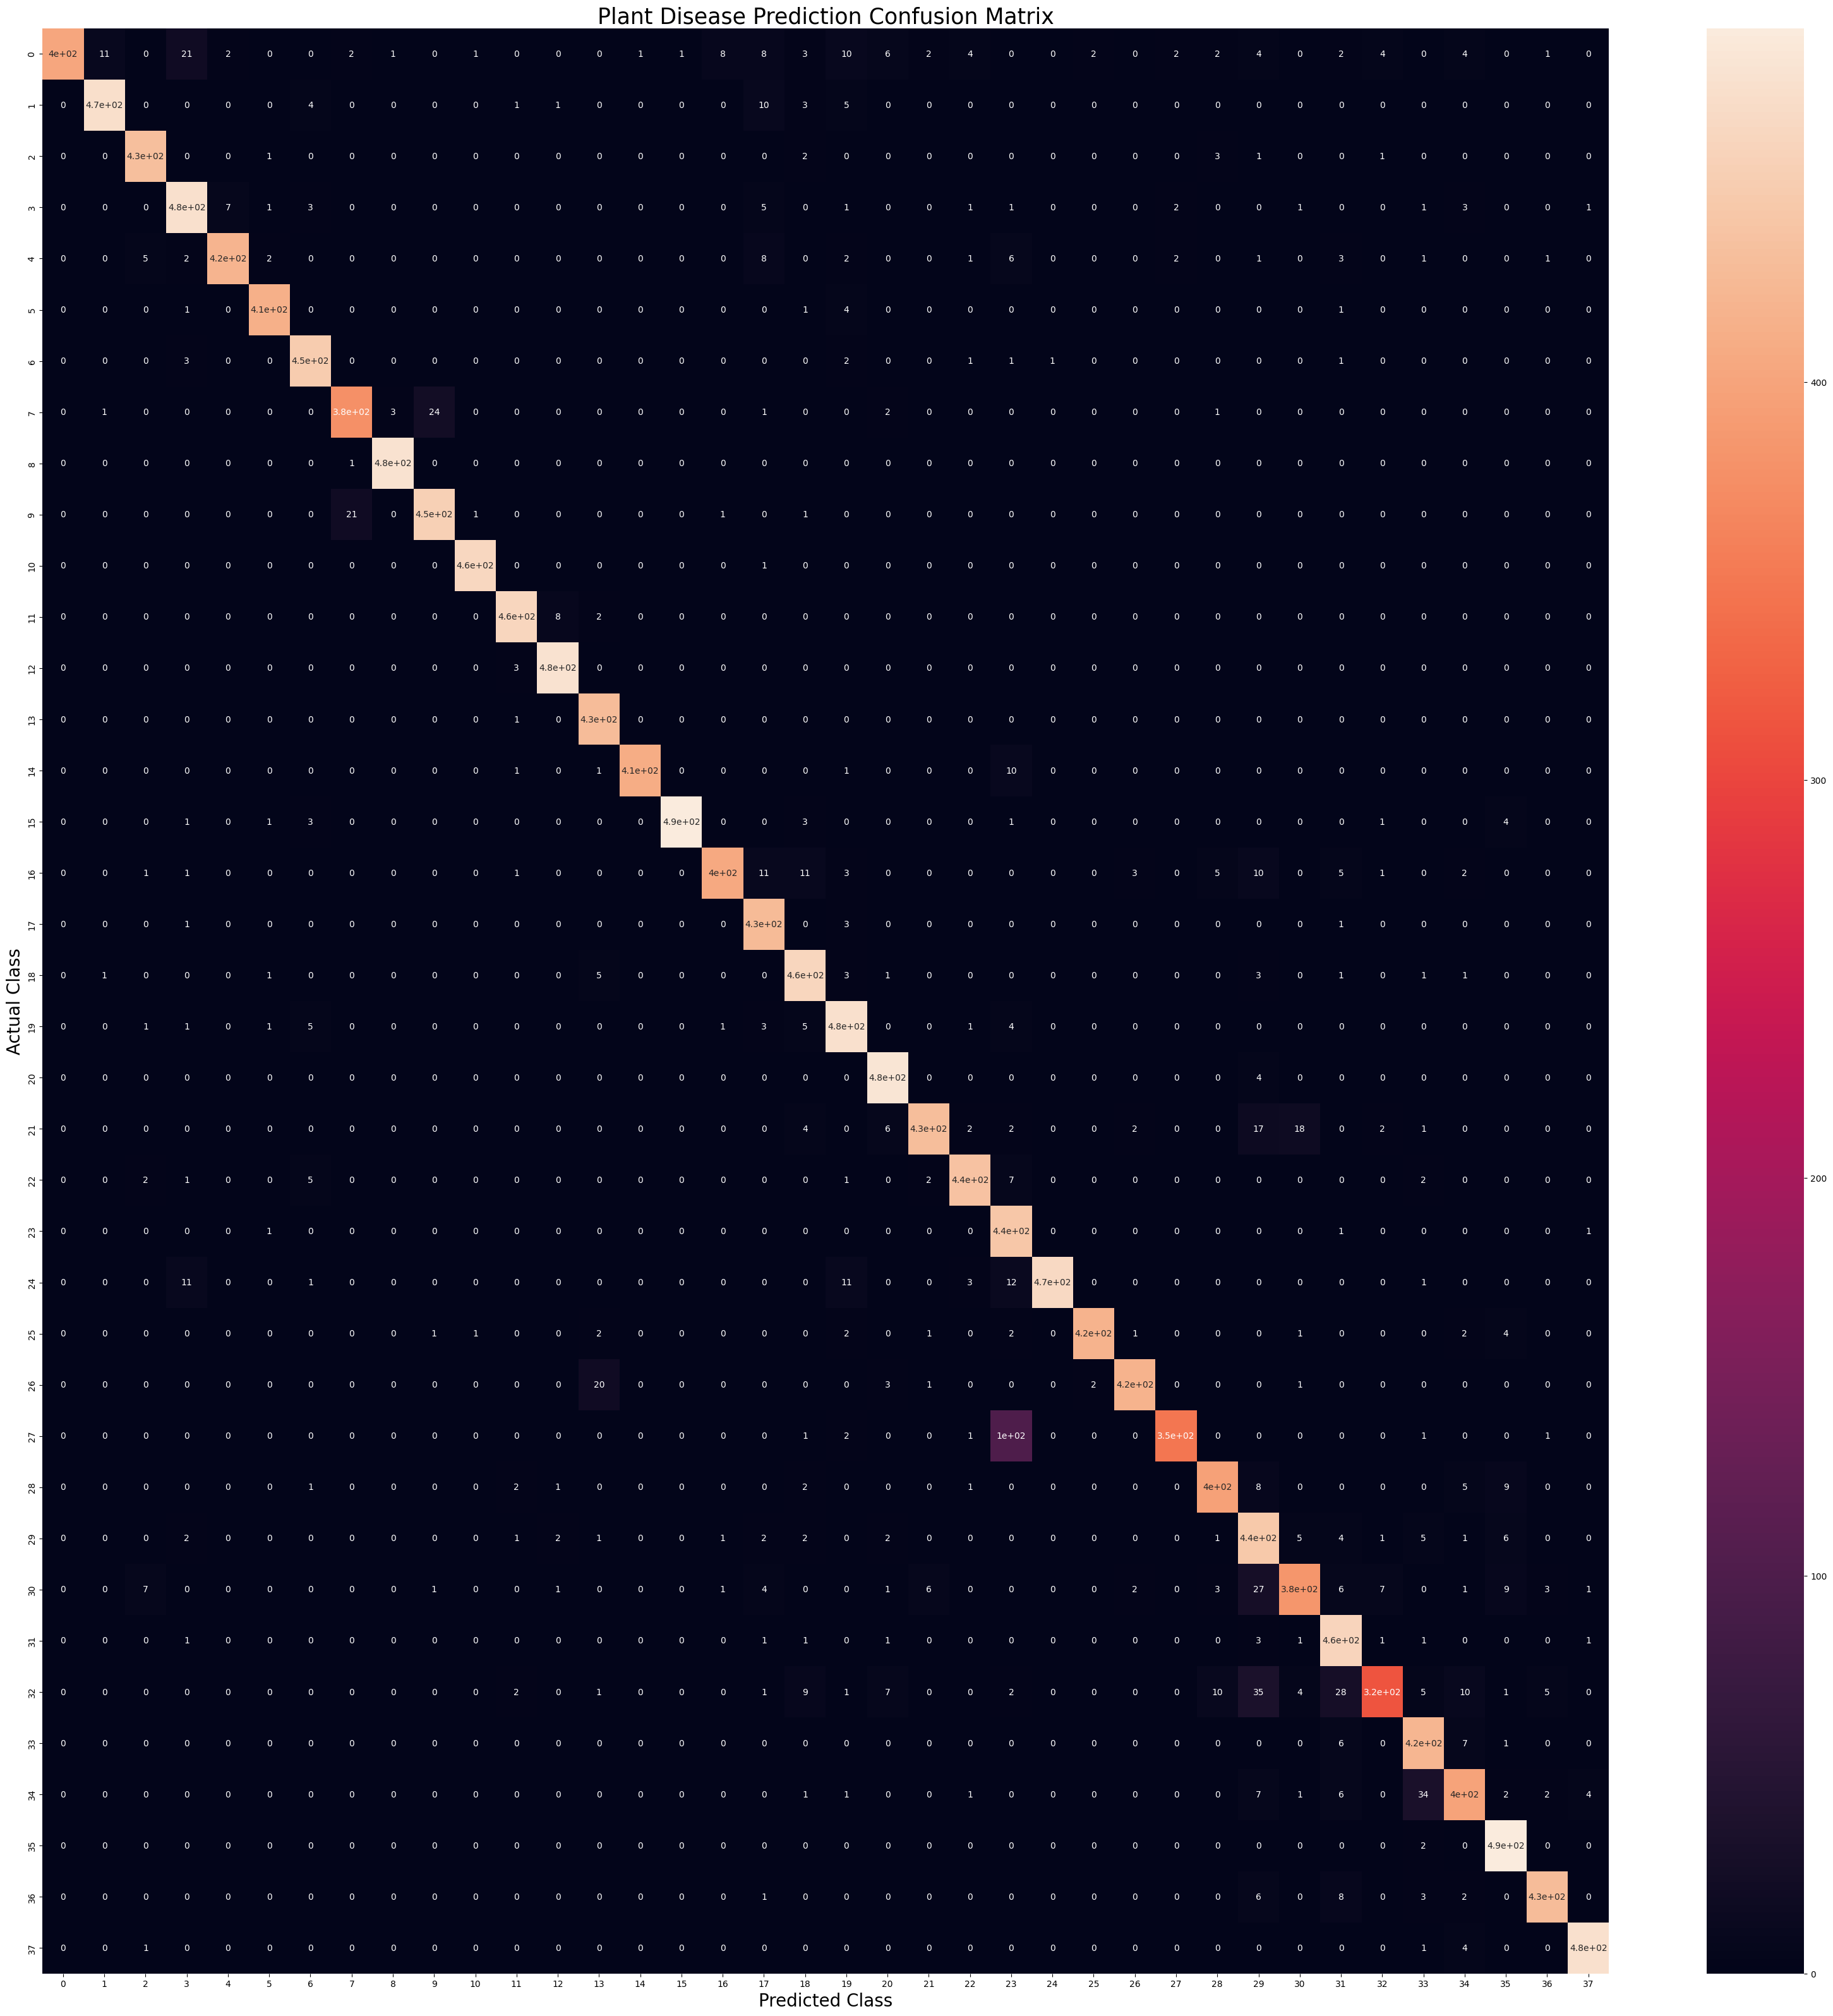

In [47]:
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True,annot_kws={'size':10})
plt.xlabel("Predicted Class",fontsize=20)
plt.ylabel("Actual Class",fontsize=20)
plt.title("Plant Disease Prediction Confusion Matrix",fontsize=25)
plt.show()